# All imports necessary

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

In [3]:
sys.path.append('..')

In [4]:
from source.code.utils.utils import filter_by_subcorpus
from source.code.utils.utils import get_tagged_texts_as_pd

In [5]:
from source.code.utils.preprocessing import additional_features
from source.code.utils.preprocessing import filtrations

In [6]:
import os
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
from tqdm.autonotebook import tqdm

In [10]:
sns.set(color_codes=True)

In [11]:
sns.set(font_scale=2)

In [12]:
%matplotlib inline

# Read the data

## Where are we at the moment

In [13]:
! pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
! ls -alth ../data/datasets/gmb-2.2.0/

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Get the subset of folders for target subcorpus (Voice of America)

In [15]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

## Read subcorpus

In [16]:
tagged_texts_as_pd = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

## Do a bit of preprocessing

In [17]:
tagged_texts_as_pd_f = filtrations(tagged_texts_as_pd)

## Add new features describing words

In [18]:
tagged_texts_as_pd_f_add_f = additional_features(tagged_texts_as_pd_f)

## Take a bit of a look into the data

In [19]:
tagged_texts_as_pd_f_add_f.head().T

,0,2,4,6,8
token,Thousands,demonstrators,marched,London,protest
pos_tag,NNS,NNS,VBN,NNP,VB
lemma,thousand,demonstrator,march,london,protest
ner_tag,O,O,O,geo-nam,O
word_net_sense_number,1,1,1,1,1
verb_net_roles,[],[],[Theme],[],"[Theme,Agent]"
semantic_relation,O,O,O,O,O
animacy_tag,Human,Human,O,Place,O
super_tag,N,N,S[pt]\NP,N,(S[b]\NP)/NP
lambda_dsr,"lam(v1,b1:drs([],[b1:[1001]:pred(v1,thousand,n...","lam(v1,b1:drs([],[b1:[1003]:pred(v1,demonstrat...","lam(v1,lam(v2,app(v1,lam(v3,merge(b1:drs([b1:[...","lam(v1,b1:drs([],[b1:[1007]:named(v1,london,ge...","lam(v1,lam(v2,lam(v3,app(v2,lam(v4,app(v1,lam(..."


In [20]:
tagged_texts_as_pd_f_add_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723600 entries, 0 to 1231277
Data columns (total 18 columns):
token                       723600 non-null object
pos_tag                     723600 non-null object
lemma                       723600 non-null object
ner_tag                     723600 non-null object
word_net_sense_number       723600 non-null object
verb_net_roles              723600 non-null object
semantic_relation           723600 non-null object
animacy_tag                 723600 non-null object
super_tag                   723600 non-null object
lambda_dsr                  723600 non-null object
ner_tagged                  723600 non-null int64
semantic_relation_tagged    723600 non-null int64
animacy_tagged              723600 non-null int64
lambda_dsr_len              723600 non-null int64
word_sense_exists           723600 non-null int64
is_title                    723600 non-null int64
contains_digits             723600 non-null int64
word_len                    

# Words distributions (for all NER-tags in general)

## Words distribution across NER-tags

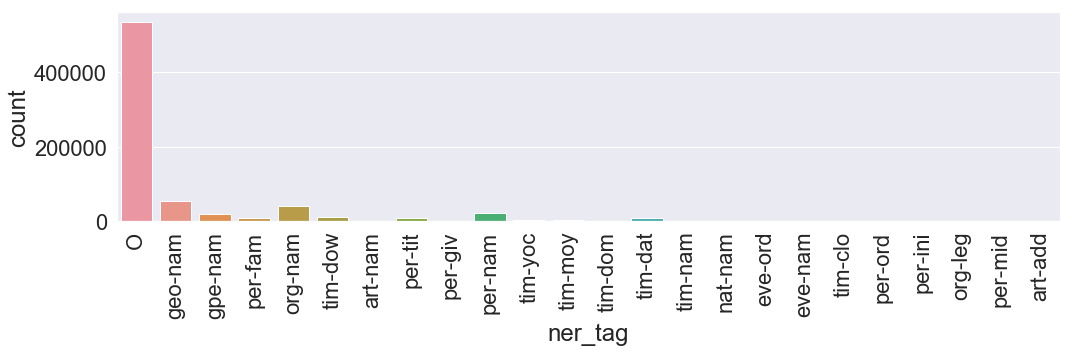

In [21]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd_f_add_f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [22]:
tagged_texts_as_pd_f_add_f.ner_tag.value_counts()

O          533756
geo-nam     54971
org-nam     42452
per-nam     22847
gpe-nam     19683
tim-dow     11398
per-tit      9660
tim-dat      8970
per-fam      8098
tim-moy      3811
tim-yoc      3009
per-giv      2376
tim-clo       757
art-nam       730
eve-nam       497
nat-nam       280
tim-nam       131
eve-ord        61
per-ini        55
per-ord        35
org-leg        13
tim-dom         8
per-mid         1
art-add         1
Name: ner_tag, dtype: int64

## Words distribution across sense numbers

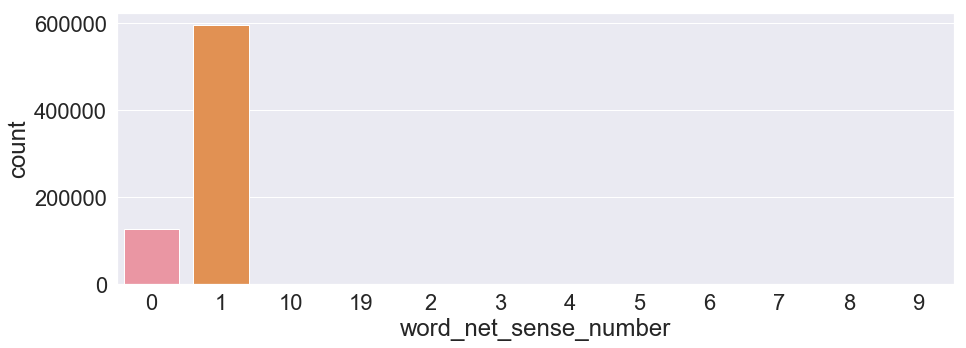

In [24]:
plt.figure(figsize=(15, 5))
sns.countplot('word_net_sense_number', data=tagged_texts_as_pd_f_add_f)
plt.show()

## Words distribution across POS-tags

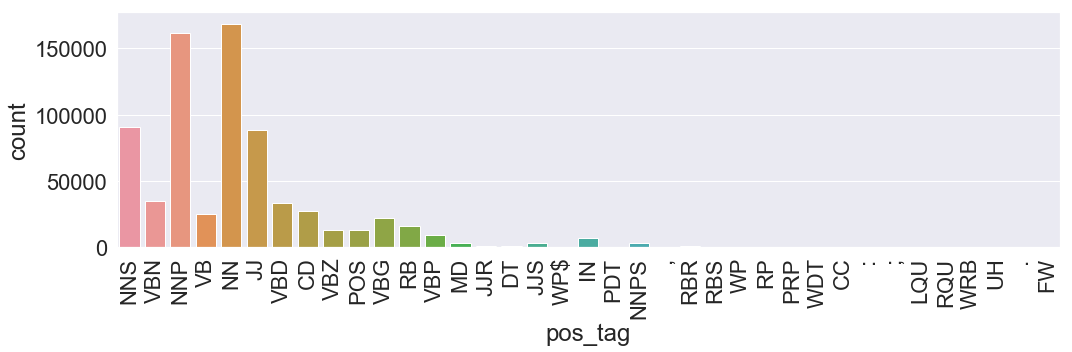

In [25]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('pos_tag', data=tagged_texts_as_pd_f_add_f, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across semantic relation prepositions

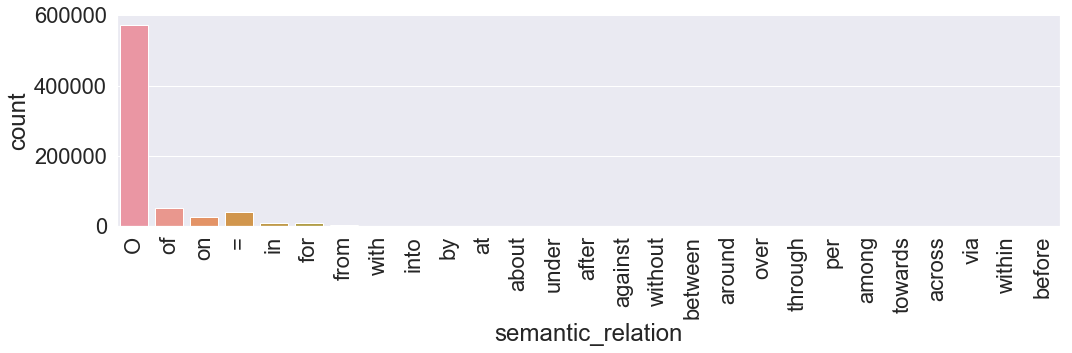

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('semantic_relation', data=tagged_texts_as_pd_f_add_f, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across animacy-tags

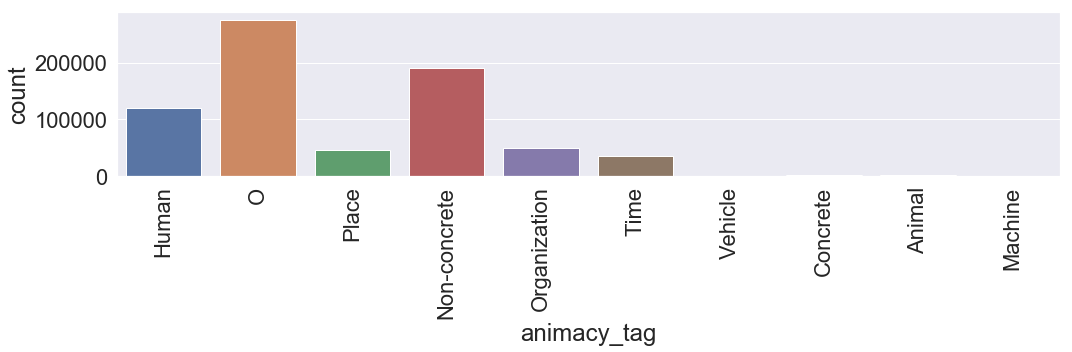

In [28]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('animacy_tag', data=tagged_texts_as_pd_f_add_f, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# Words distributions (separated by each NER-tag)

## Words distribution across sense numbers

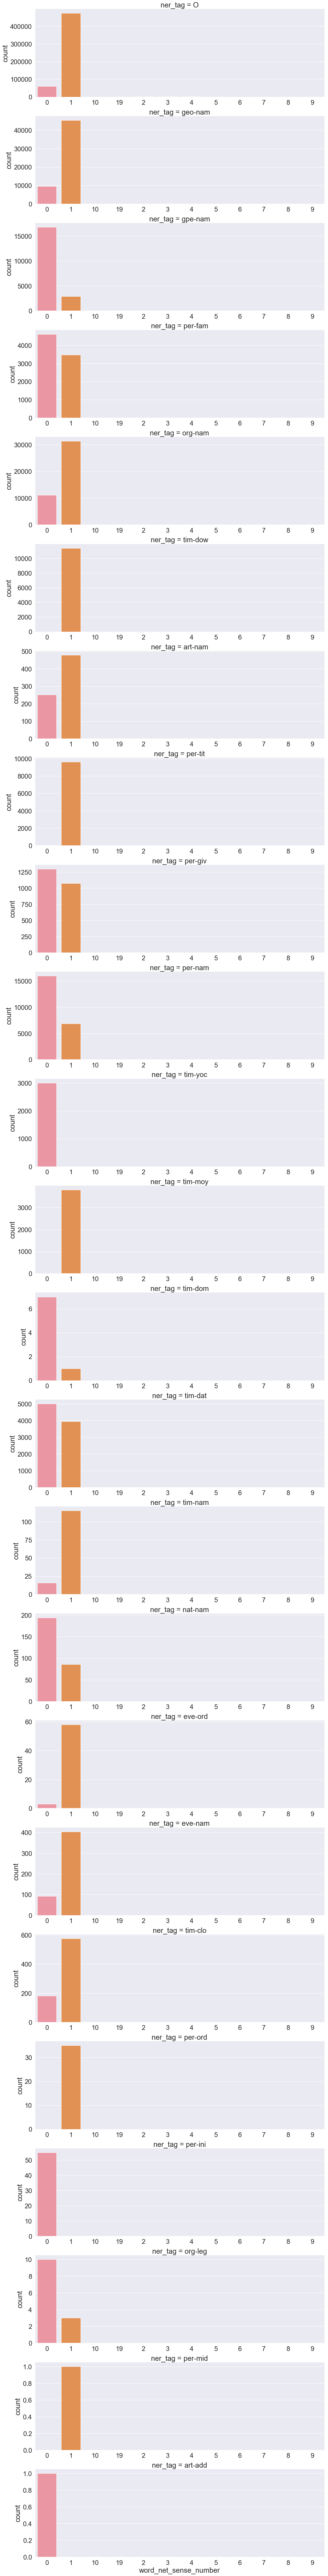

In [29]:
sns.catplot('word_net_sense_number', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
plt.show()

## Words distribution across POS-tags

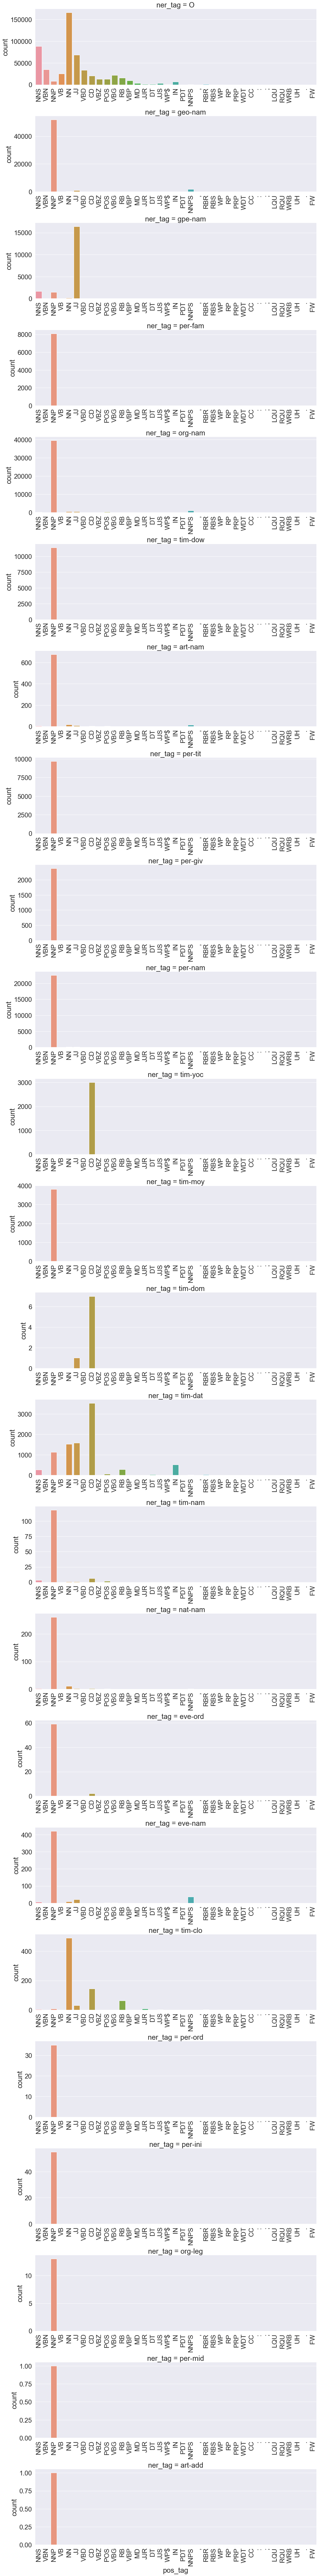

In [30]:
g = sns.catplot('pos_tag', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across semantic relation prepositions

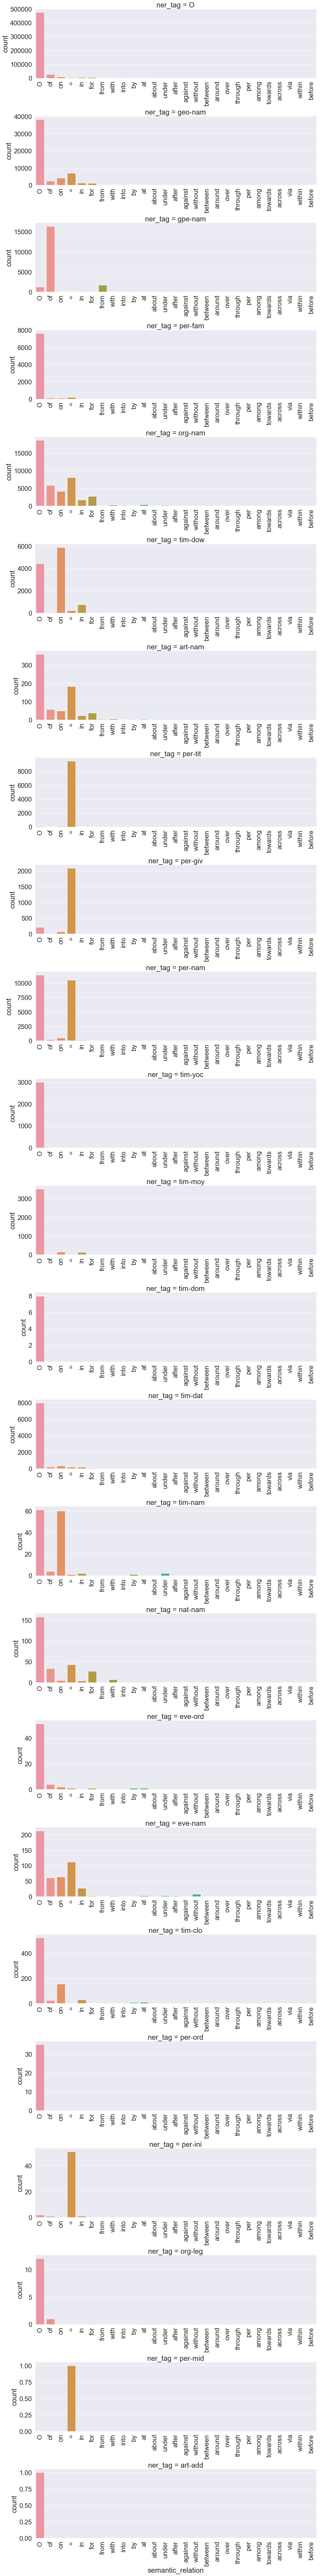

In [31]:
g = sns.catplot('semantic_relation', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across animacy-tags

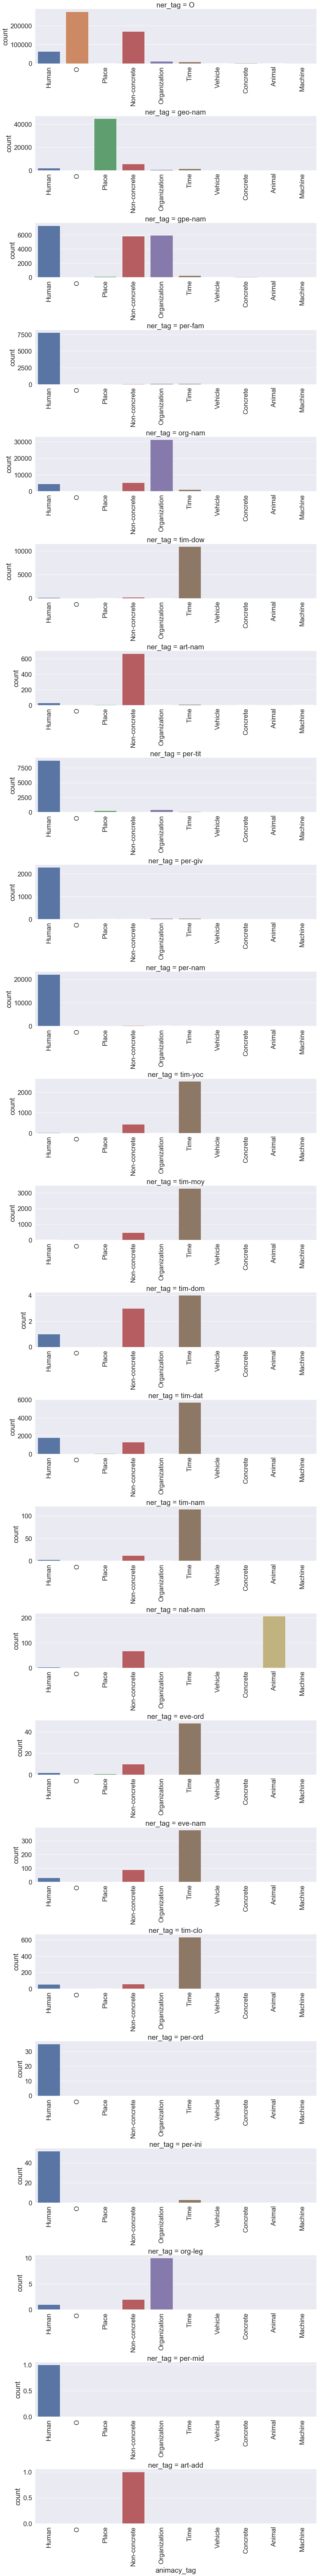

In [32]:
g = sns.catplot('animacy_tag', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across word lengths

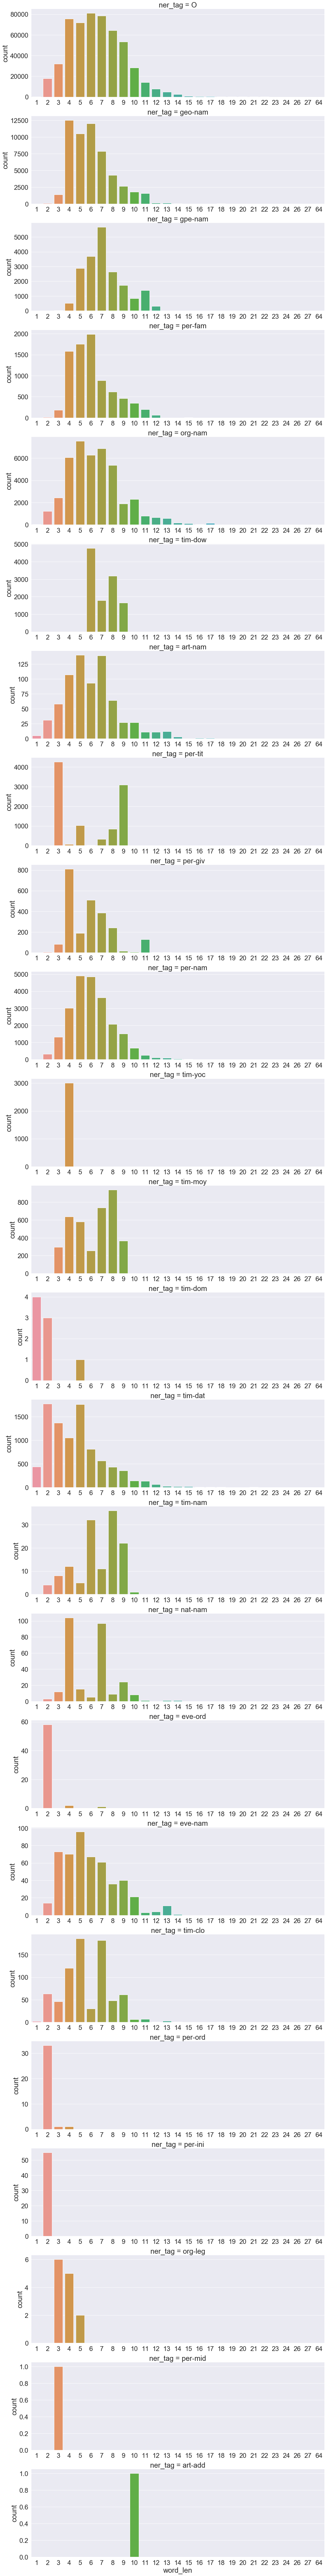

In [33]:
sns.catplot('word_len', col='ner_tag', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
plt.show()

## Words distribution across semantic relation existence

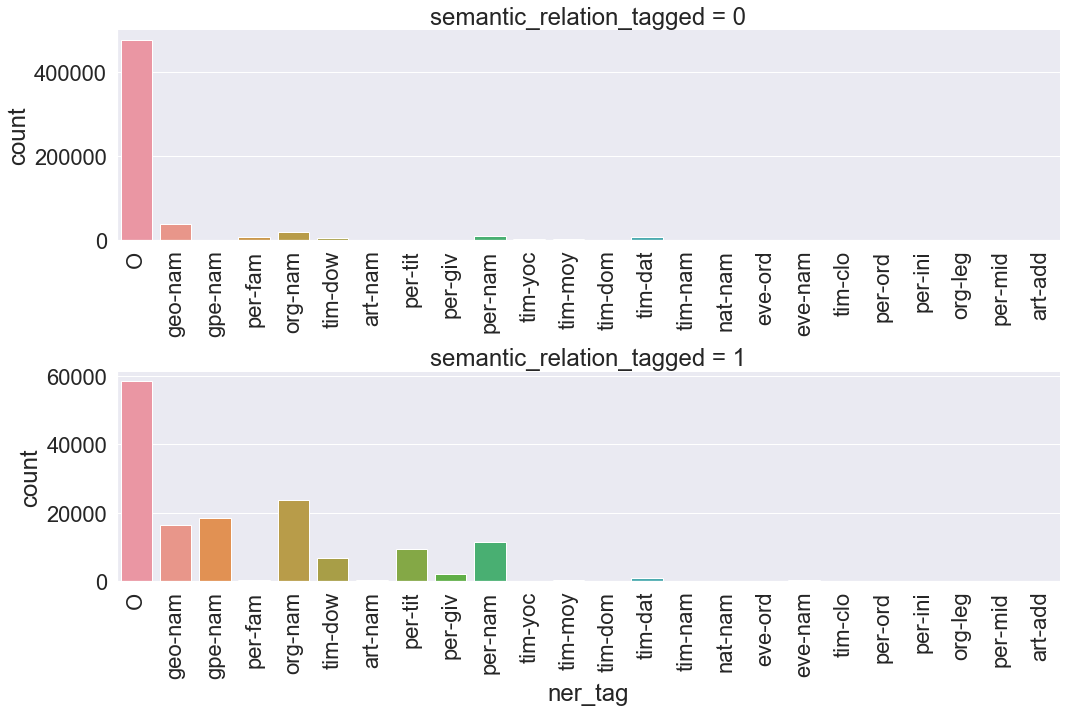

In [39]:
g = sns.catplot('ner_tag', col='semantic_relation_tagged', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across animacy tag existence

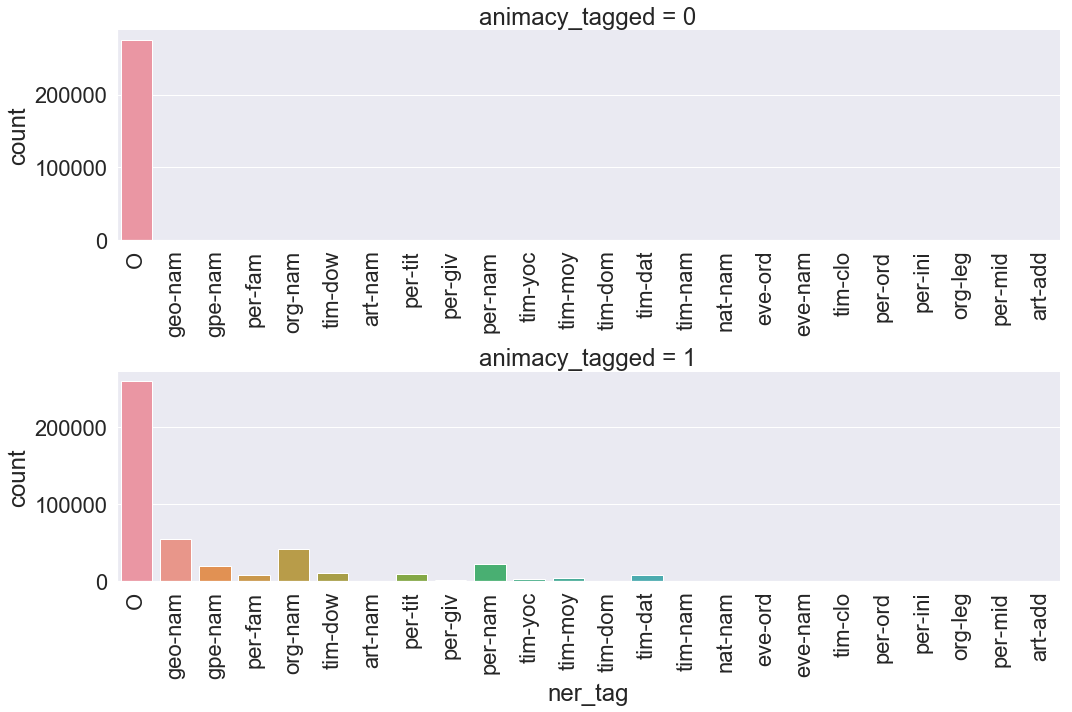

In [40]:
g = sns.catplot('ner_tag', col='animacy_tagged', data=tagged_texts_as_pd_f_add_f, kind="count", orient='h', col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across word sense existence

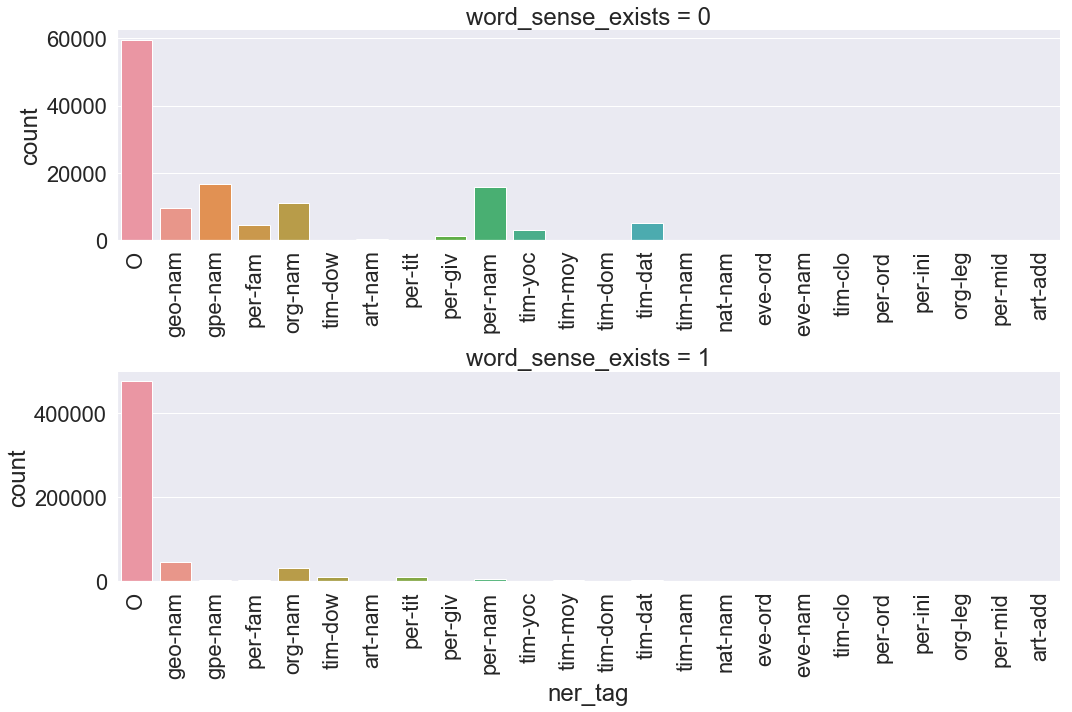

In [42]:
g = sns.catplot('ner_tag', col='word_sense_exists', data=tagged_texts_as_pd_f_add_f, kind="count", col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across NER-tags (for titled and not titled words)

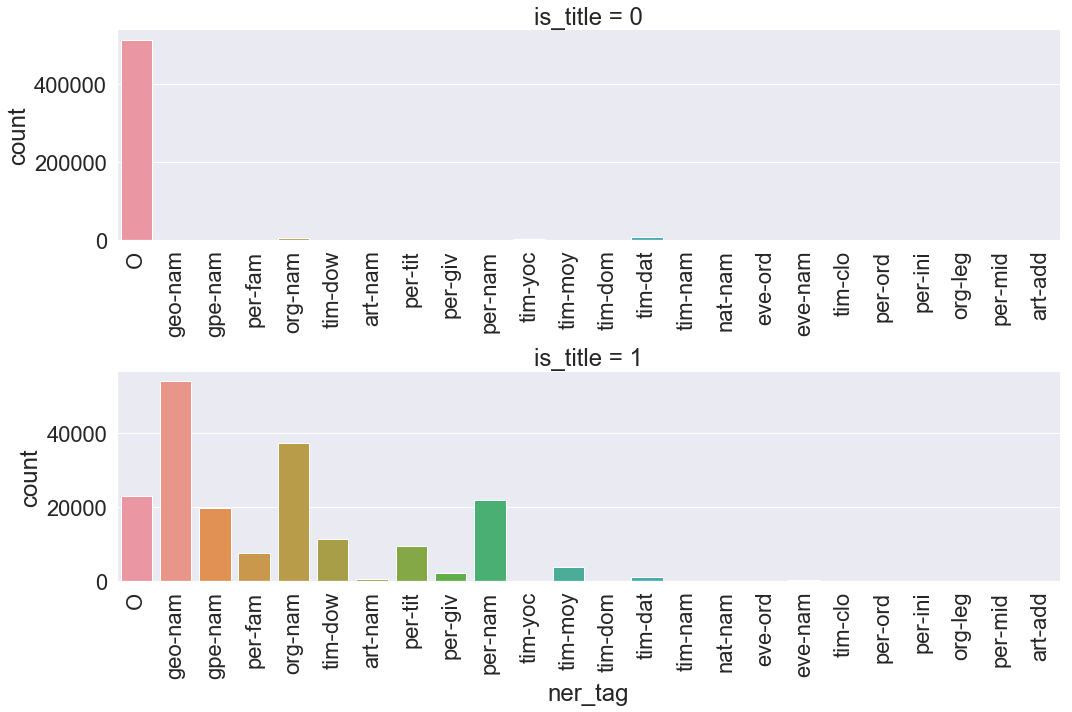

In [43]:
g = sns.catplot('ner_tag', col='is_title', data=tagged_texts_as_pd_f_add_f, kind="count", col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Words distribution across NER-tags (for words with and without digits)

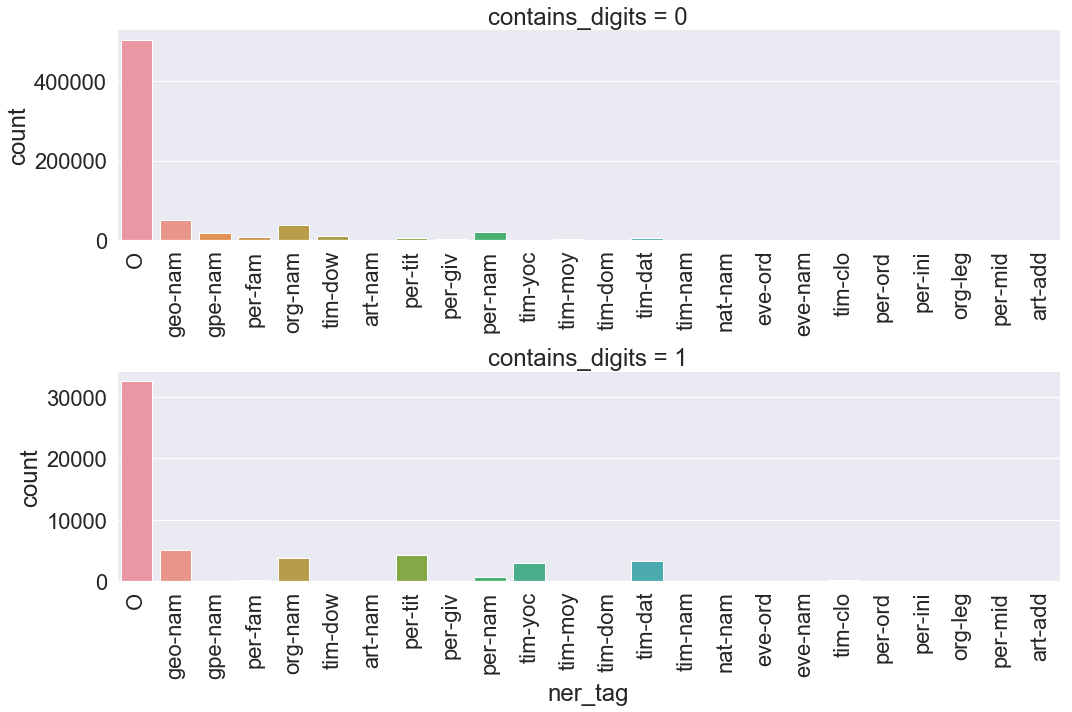

In [44]:
g = sns.catplot('ner_tag', col='contains_digits', data=tagged_texts_as_pd_f_add_f, kind="count", col_wrap=1, sharex=False, sharey=False, aspect=3)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Distribution of lambda-DSR mean lengths across NER-tags

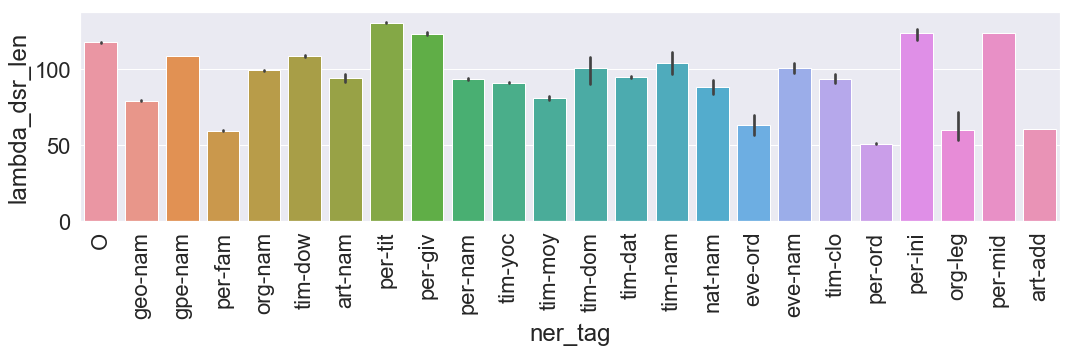

In [47]:
plt.figure(figsize=(15, 5))
ax = sns.barplot("ner_tag", "lambda_dsr_len", data=tagged_texts_as_pd_f_add_f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Distribution of word mean lengths across NER-tags

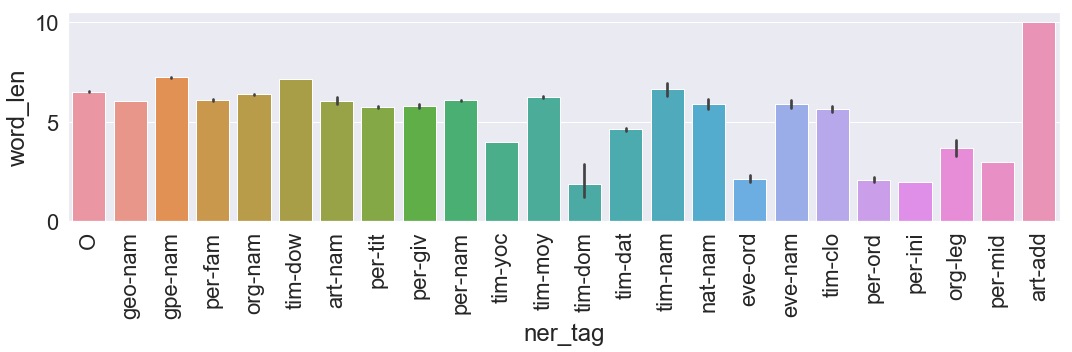

In [48]:
plt.figure(figsize=(15, 5))
ax = sns.barplot("ner_tag", "word_len", data=tagged_texts_as_pd_f_add_f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# Conclusion